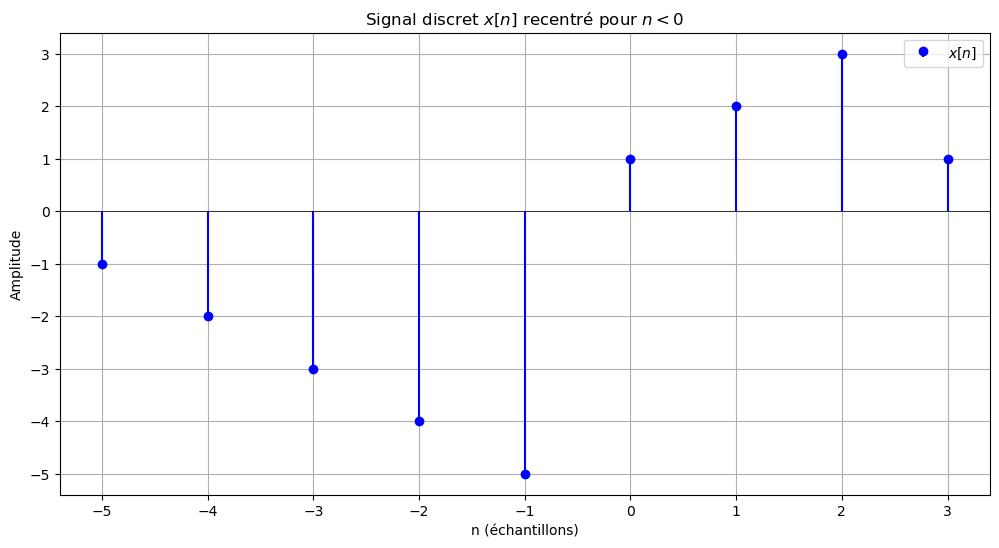

In [53]:
# Activer l'affichage dans le notebook
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Paramètres
N_positive = 4  # Nombre d'échantillons pour n >= 0
N_negative = 5   # Nombre d'échantillons pour n < 0
n = np.arange(-N_negative, N_positive)  # Indices allant de -5 à 9

# Initialisation avec des valeurs négatives et des impulsions
x_n = np.zeros(len(n))  # Initialisation

# Ajouter des valeurs négatives pour n < 0
x_n[:N_negative] = [-1, -2, -3, -4, -5]


x_n[N_negative + 0:] = [1, 2, 3, 1]# Valeurs négatives

# Ajouter des valeurs aléatoires pour n > 3
 # Mélange de négatifs et positifs

# Tracer le signal
plt.figure(figsize=(12, 6))
plt.stem(n, x_n, basefmt=" ", linefmt="blue", markerfmt="bo", label='$x[n]$')
plt.axhline(0, color='black', linewidth=0.5)  # Ligne de base pour recentrer
plt.title("Signal discret $x[n]$ recentré pour $n < 0$")
plt.xlabel("n (échantillons)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

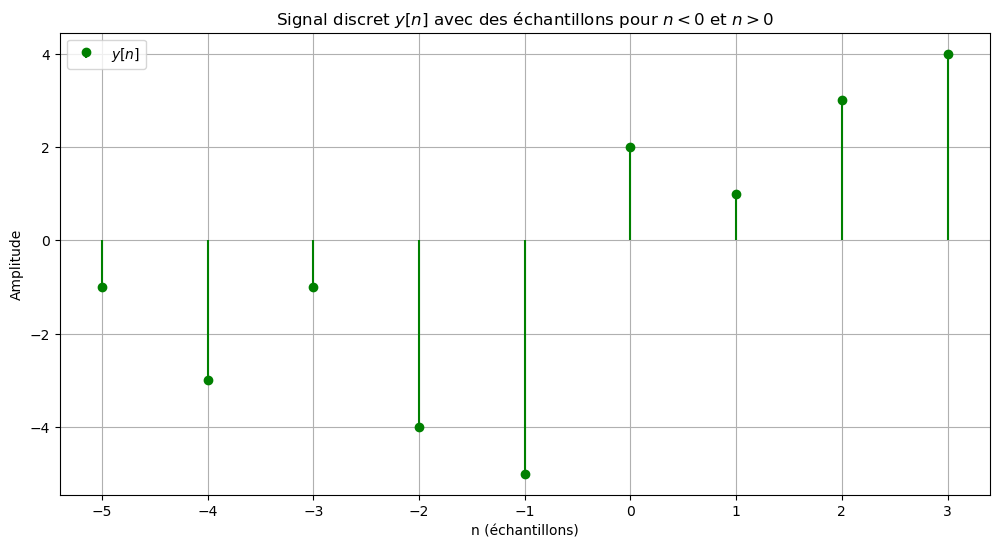

In [57]:
# Activer l'affichage dans le notebook
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Paramètres
N_positive = 4  # Nombre d'échantillons pour n >= 0
N_negative = 5   # Nombre d'échantillons pour n < 0
n = np.arange(-N_negative, N_positive)  # Indices allant de -5 à 9

# Initialisation de y[n] avec des valeurs différentes
y_n = np.zeros(len(n))  # Initialisation

# Ajouter des valeurs aléatoires pour n < 0 (négatives)
y_n[:N_negative] = [-1, -3, -1, -4, -5]  # Valeurs aléatoires négatives


y_n[N_negative + 0:] = [2, 1, 3, 4]
# Ajouter des valeurs aléatoires pour n > 3 (positives et négatives)


# Tracer le signal y[n]
plt.figure(figsize=(12, 6))
plt.stem(n, y_n, basefmt=" ", linefmt="green", markerfmt="go", label='$y[n]$')
plt.title("Signal discret $y[n]$ avec des échantillons pour $n < 0$ et $n > 0$")
plt.xlabel("n (échantillons)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()


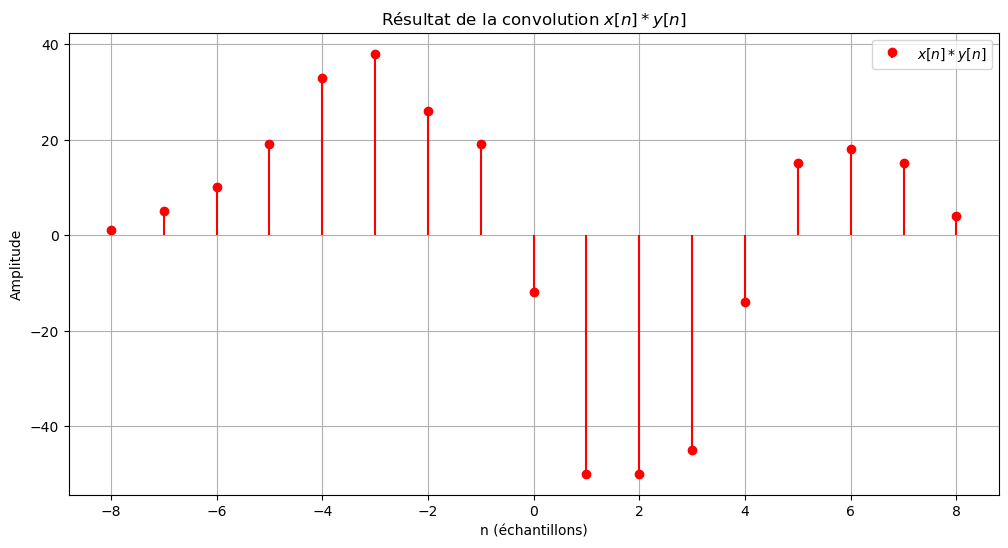

In [59]:
conv_result = np.convolve(x_n, y_n, mode='full')  # Convolution complète
conv_indices = np.arange(-len(x_n) + 1, len(y_n))  # Indices pour la convolution

# Tracer le résultat de la convolution
plt.figure(figsize=(12, 6))
plt.stem(conv_indices, conv_result, basefmt=" ", linefmt="red", markerfmt="ro", label='$x[n] * y[n]$')
plt.title("Résultat de la convolution $x[n] * y[n]$")
plt.xlabel("n (échantillons)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()


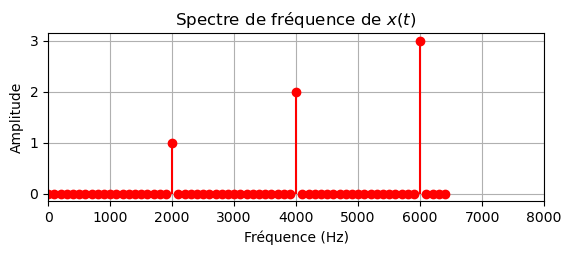

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres du signal
fs = 13000  # Fréquence d'échantillonnage (Hz)
t = np.arange(0, 0.01, 1/fs)  # Temps de 0 à 10 ms avec un pas de 1/fs
x_t =  np.cos(2 * np.pi * 2000 * t) + 2 * np.cos(2 * np.pi * 4000 * t) + 3 * np.cos(2 * np.pi * 6000 * t)

# Calcul du spectre
N = len(x_t)  # Nombre d'échantillons
frequencies = np.fft.fftfreq(N, 1/fs)[:N//2]  # Fréquences positives
X_f = np.fft.fft(x_t)[:N//2]  # FFT sur les fréquences positives
amplitudes = 2 * np.abs(X_f) / N  # Normalisation des amplitudes


# Affichage du spectre de fréquence
plt.subplot(2, 1, 2)
plt.stem(frequencies, amplitudes, basefmt=" ", linefmt="red", markerfmt="ro")
plt.title("Spectre de fréquence de $x(t)$")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude")
plt.grid()

# Zoomer sur les fréquences d'intérêt (0 à 8000 Hz)
plt.xlim(0, 8000)
plt.show()

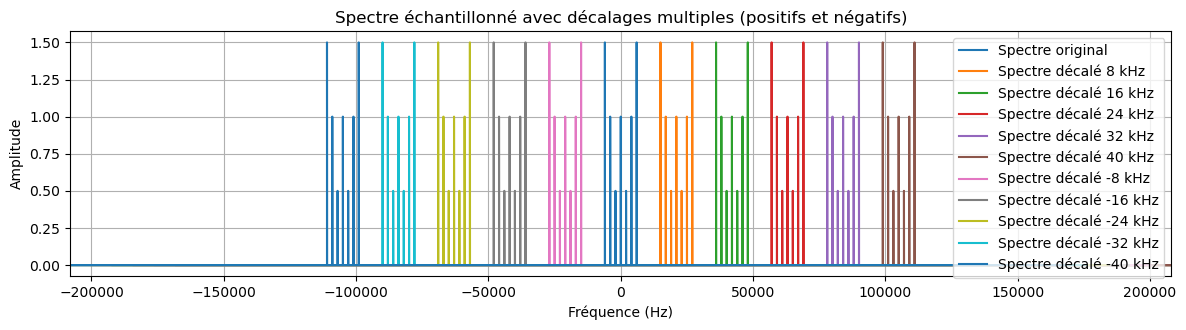

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
from scipy.signal import resample

# 1. Définition du signal x(t)
fs = 13000  # Fréquence d'échantillonnage initiale (Hz)
T = 1 / fs   # Période d'échantillonnage
t = np.linspace(0, 1, fs, endpoint=False)  # Temps (1 seconde)

# Signal x(t) : composé de sinusoïdes à différentes fréquences
x_t = 1 + np.cos(2 * np.pi * 2000 * t) + 2 * np.cos(2 * np.pi * 4000 * t) + 3 * np.cos(2 * np.pi * 6000 * t)

# 2. Interpolation pour doubler la fréquence d'échantillonnage par un facteur de 32
new_fs = fs * 32  # Nouvelle fréquence d'échantillonnage
new_t = np.linspace(0, 1, new_fs, endpoint=False)  # Nouveau temps échantillonné
x_t_resampled = resample(x_t, len(new_t))  # Interpolation du signal

# 3. Calcul de la FFT du signal rééchantillonné
fft_result_resampled = fft(x_t_resampled)  # Transformée de Fourier rapide
frequencies_resampled = fftfreq(len(x_t_resampled), 1 / new_fs)  # Fréquences associées

# 4. Spectre échantillonné : Décalage du spectre pour visualiser plus clairement
amplitude_shifted_resampled = np.fft.fftshift(np.abs(fft_result_resampled) / len(x_t_resampled))  # Décalage du spectre
frequencies_shifted_resampled = np.fft.fftshift(frequencies_resampled)  # Décalage des fréquences

# 5. Recopier le signal et le spectre à des multiples de ±8 dans le domaine fréquentiel
multiples_positive = [1, 2, 3, 4, 5]  # Décalage par des multiples de 8 (positifs)
multiples_negative = [-1, -2, -3, -4, -5]  # Décalage par des multiples de 8 (négatifs)
x_t_all = np.copy(x_t_resampled)  # Stocker les signaux sur la même courbe
frequencies_all = np.copy(frequencies_shifted_resampled)  # Stocker les fréquences décalées

# Créer de nouvelles versions du signal à des multiples de ±8
for multiple in multiples_positive + multiples_negative:
    # Décalage fréquentiel
    shifted_signal = np.roll(x_t_resampled, multiple * fs)  # Décalage temporel
    x_t_all = np.concatenate([x_t_all, shifted_signal])
    
    # Décalage des fréquences pour la FFT
    shifted_frequencies = frequencies_shifted_resampled + (multiple * 8 * 1000)  # Décalage par des multiples de ±8
    frequencies_all = np.concatenate([frequencies_all, shifted_frequencies])

# 6. Visualisation des signaux et des spectres
plt.figure(figsize=(12, 6))

# Graphique 1: Signal dans le domaine temporel (avant et après interpolation et copies)



# Graphique 2: Spectre échantillonné avec décalages multiples (en incluant les fréquences négatives)
plt.subplot(2, 1, 2)
plt.plot(frequencies_shifted_resampled, amplitude_shifted_resampled, label="Spectre original")
for multiple in multiples_positive + multiples_negative:
    shifted_frequencies = frequencies_shifted_resampled + (multiple * 8 * 1000)
    shifted_amplitude = np.roll(amplitude_shifted_resampled, multiple * fs)
    plt.plot(shifted_frequencies, shifted_amplitude, label=f"Spectre décalé {multiple * 8} kHz")
plt.title("Spectre échantillonné avec décalages multiples (positifs et négatifs)")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(-new_fs/2, new_fs/2)  # Plage de fréquences jusqu'à la fréquence de Nyquist
plt.legend()

plt.tight_layout()
plt.show()


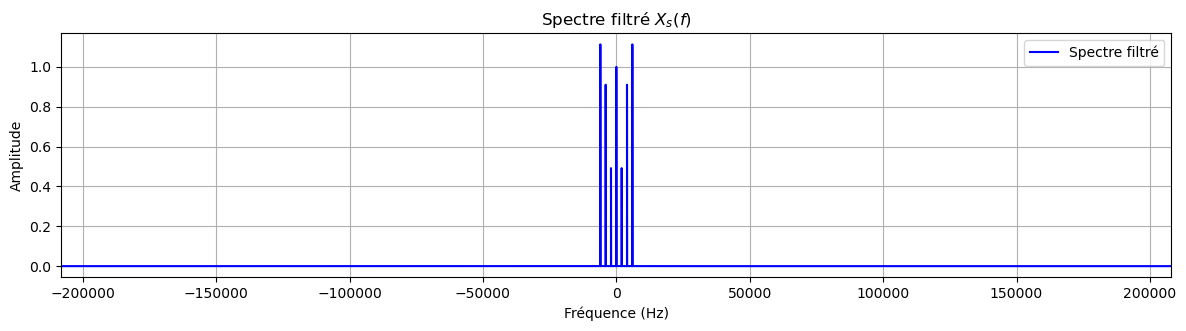

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import resample, firwin, lfilter

# 1. Définition du signal x(t)
fs = 13000  # Fréquence d'échantillonnage initiale (Hz)
T = 1 / fs   # Période d'échantillonnage
t = np.linspace(0, 1, fs, endpoint=False)  # Temps (1 seconde)

# Signal x(t) : composé de sinusoïdes à différentes fréquences
x_t = 1 + 0.5 * np.cos(2 * np.pi * 2000 * t) + 1.0 * np.cos(2 * np.pi * 4000 * t) + 1.5 * np.cos(2 * np.pi * 6000 * t)

# 2. Interpolation pour doubler la fréquence d'échantillonnage par un facteur de 32
new_fs = fs * 32  # Nouvelle fréquence d'échantillonnage
new_t = np.linspace(0, 1, new_fs, endpoint=False)  # Nouveau temps échantillonné
x_t_resampled = resample(x_t, len(new_t))  # Interpolation du signal

# 3. Création du filtre passe-bas
cutoff_freq = 8000  # Fréquence de coupure du filtre passe-bas (Hz)
numtaps = 101  # Nombre de taps (coefficients) pour le filtre FIR
lowpass_filter = firwin(numtaps, cutoff_freq, fs=new_fs)  # Créer le filtre FIR passe-bas

# 4. Application du filtre passe-bas
x_t_filtered = lfilter(lowpass_filter, 1.0, x_t_resampled)

# 5. Calcul de la FFT du signal filtré
fft_result_filtered = fft(x_t_filtered)  # Transformée de Fourier rapide
frequencies_filtered = fftfreq(len(x_t_filtered), 1 / new_fs)  # Fréquences associées

# Normalisation des amplitudes (correction pour amplitudes doubles sauf pour DC et Nyquist)
amplitude_filtered = np.abs(fft_result_filtered) / len(x_t_filtered)
amplitude_filtered[1:] *= 2  # Multiplier par 2 pour les fréquences non-DC
amplitude_shifted_filtered = fftshift(amplitude_filtered)  # Décalage du spectre
frequencies_shifted_filtered = fftshift(frequencies_filtered)  # Décalage des fréquences

# 6. Visualisation

# Graphique 1: Signal dans le domaine temporel avant et après interpolation et filtrage
plt.figure(figsize=(12, 6))



# Graphique 2: Spectre échantillonné avant et après interpolation et filtrage
plt.subplot(2, 1, 2)
plt.plot(frequencies_shifted_filtered, amplitude_shifted_filtered, label="Spectre filtré", color="blue")
plt.title("Spectre filtré $X_s(f)$")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(-new_fs / 2, new_fs / 2)  # Plage de fréquences jusqu'à la fréquence de Nyquist
plt.legend()

plt.tight_layout()
plt.show()
